In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

In [14]:
print(data.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [15]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)


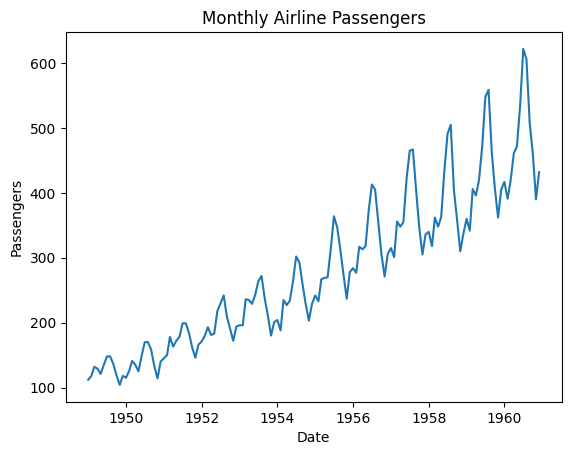

In [16]:
plt.plot(data['Passengers'])
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

values = data['Passengers'].values
values = values.reshape(-1, 1)
# نرمال‌سازی بین 0 و 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)

In [18]:
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [19]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train, time_steps)
X_test, y_test = create_sequences(test, time_steps)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (105, 10, 1)
Shape of y_train: (105, 1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.1084 - val_loss: 0.3655
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0679 - val_loss: 0.2305
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0341 - val_loss: 0.0841
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0140 - val_loss: 0.0280
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0183 - val_loss: 0.0389
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0111 - val_loss: 0.0655
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0111 - val_loss: 0.0631
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0112 - val_loss: 0.0392
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0097 - val_loss: 0.0306
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0081 - val_loss: 0.0330
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0066 - val_loss: 0.0331
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0080 - val_loss: 0.0310
Epoch 13/50

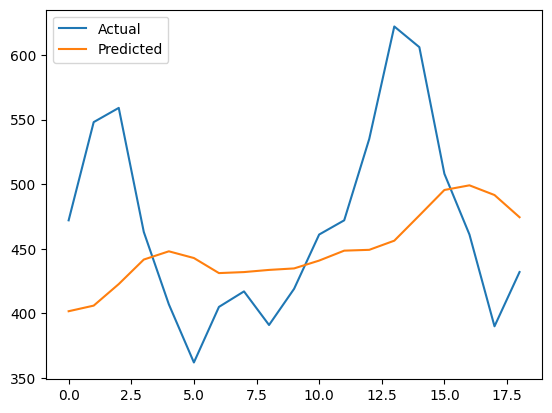

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.1099 - val_loss: 0.4791
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0823 - val_loss: 0.4227
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0753 - val_loss: 0.3605
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0607 - val_loss: 0.2825
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - val_loss: 0.1870
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0219 - val_loss: 0.0907
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0175 - val_loss: 0.0430
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0205 - val_loss: 0.0492
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0174 - val_loss: 0.0762
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - val_loss: 0.0968
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - val_loss: 0.0985
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - val_loss: 0.0719


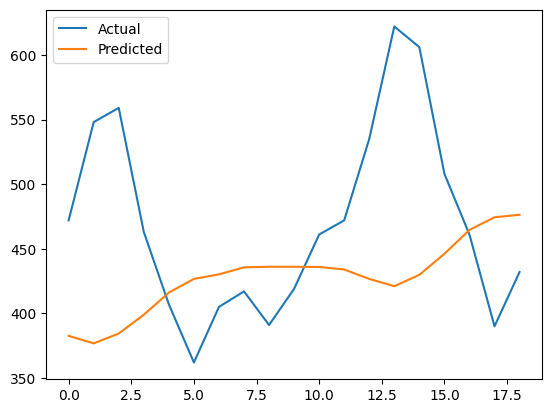

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences= True))
#newlayer
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.1025 - val_loss: 0.4093
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0800 - val_loss: 0.3365
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0616 - val_loss: 0.2654
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0412 - val_loss: 0.1946
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0229 - val_loss: 0.1251
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0171 - val_loss: 0.0653
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0094 - val_loss: 0.0353
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0122 - val_loss: 0.0281
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - val_loss: 0.0341
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0101 - val_loss: 0.0409
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0082 - val_loss: 0.0393
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0090 - val_loss: 0.0298


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


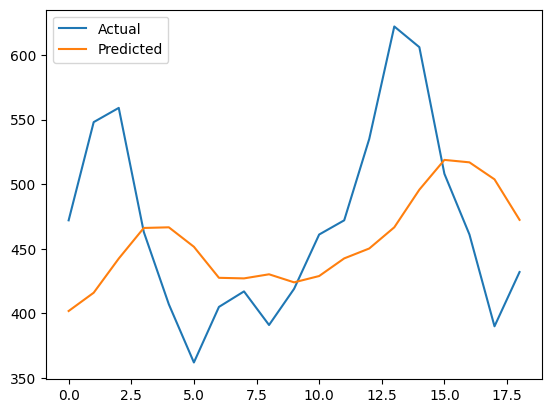

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
#dense
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.1125 - val_loss: 0.5022
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1038 - val_loss: 0.4316
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0806 - val_loss: 0.3678
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0638 - val_loss: 0.3075
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0548 - val_loss: 0.2503
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0387 - val_loss: 0.1910
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0253 - val_loss: 0.1295
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0164 - val_loss: 0.0760
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - val_loss: 0.0459
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0139 - val_loss: 0.0381
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133 - val_loss: 0.0435
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - val_loss: 0.0526
Epoch 13/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


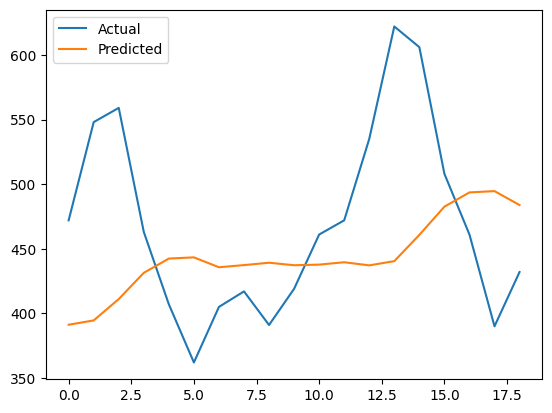

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
#optimizer
model.add(Dense(1))
optimizer= Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.1223 - val_loss: 0.4898
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0945 - val_loss: 0.4164
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0693 - val_loss: 0.3513
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0711 - val_loss: 0.2901
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0411 - val_loss: 0.2336
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - val_loss: 0.1776
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0264 - val_loss: 0.1254
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0167 - val_loss: 0.0792
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123 - val_loss: 0.0477
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - val_loss: 0.0360
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0112 - val_loss: 0.0356
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - val_loss: 0.0418


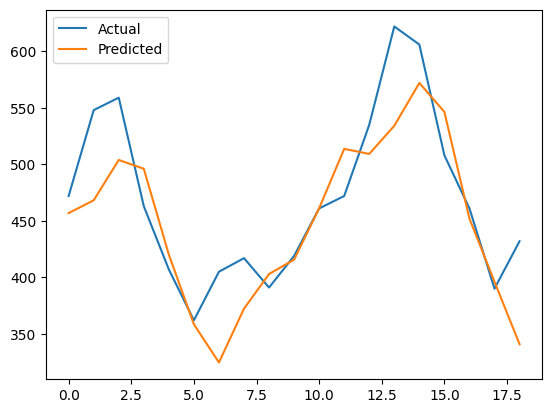

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#epoch
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0958 - val_loss: 0.2885
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0460 - val_loss: 0.1117
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - val_loss: 0.0303
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0173 - val_loss: 0.0295
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0125 - val_loss: 0.0467
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0097 - val_loss: 0.0627
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0114 - val_loss: 0.0532
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0077 - val_loss: 0.0378
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - val_loss: 0.0293
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0086 - val_loss: 0.0294
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - val_loss: 0.0321
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0072 - val_loss: 0.0342


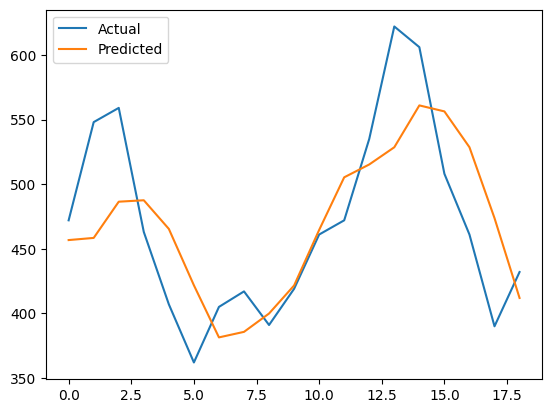

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#epoch
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1094 - val_loss: 0.4454
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0822 - val_loss: 0.3582
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0585 - val_loss: 0.2609
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0298 - val_loss: 0.1557
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0221 - val_loss: 0.0680
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0153 - val_loss: 0.0471
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - val_loss: 0.0593
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0652
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - val_loss: 0.0568
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - val_loss: 0.0380
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0096 - val_loss: 0.0331
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069 - val_loss: 0.0323
Epoch 13/50
7/7 ━━

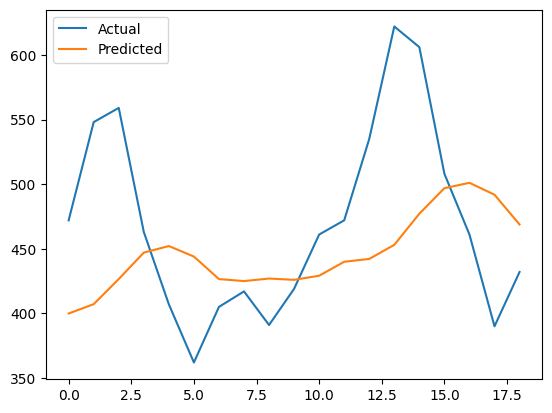

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#batchsize
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 0.1206 - val_loss: 0.5342
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1046 - val_loss: 0.5062
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1038 - val_loss: 0.4819
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0957 - val_loss: 0.4599
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0892 - val_loss: 0.4385
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0786 - val_loss: 0.4177
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0806 - val_loss: 0.3964
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0706 - val_loss: 0.3736
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0641 - val_loss: 0.3497
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0591 - val_loss: 0.3247
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0511 - val_loss: 0.2983
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0459 - val_loss: 0.2700
Epoch 13/50

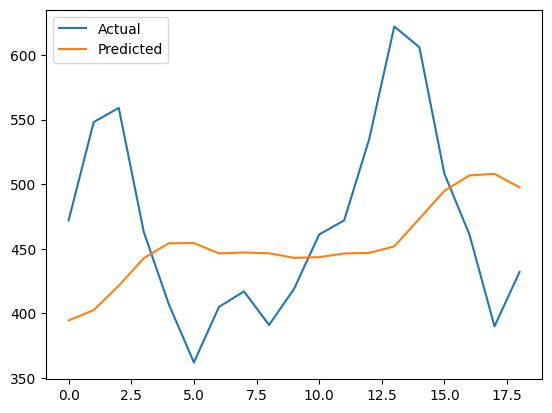

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#batch
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0567 - val_loss: 0.2299
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0403 - val_loss: 0.1835
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0323 - val_loss: 0.1417
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0242 - val_loss: 0.1029
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0137 - val_loss: 0.0681
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088 - val_loss: 0.0387
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0204
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0064 - val_loss: 0.0154
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - val_loss: 0.0161
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - val_loss: 0.0196
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - val_loss: 0.0244
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - val_loss: 0.0273
Epoch 13/50


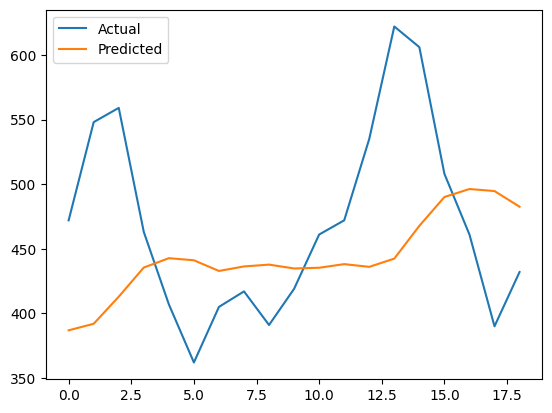

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#lstm
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
#loss
model.compile(optimizer='adam', loss='huber')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0918 - val_loss: 0.3715
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0479 - val_loss: 0.2203
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0326 - val_loss: 0.0750
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128 - val_loss: 0.0316
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0113 - val_loss: 0.0487
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - val_loss: 0.0471
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0099 - val_loss: 0.0311
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0086 - val_loss: 0.0319
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090 - val_loss: 0.0319
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - val_loss: 0.0308
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - val_loss: 0.0312
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0306
Epoch 

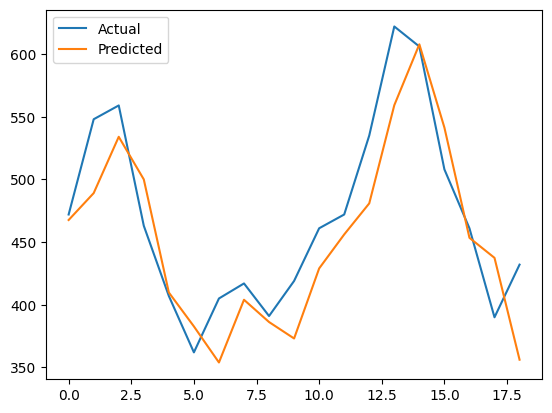

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
#lstm
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
optimizer= Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()